In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

%matplotlib notebook

# Introduction to Supervised Learning

##### Version 0.1 

***

By AA Miller (Northwestern/CIERA)  
03 March 2022

Using the [ten hundred most common words](https://xkcd.com/simplewriter/) in the English language,$^\dagger$ I would describe supervised learning as

> building an information map to name different groups

$^\dagger$ See [Up-goer five](https://xkcd.com/1133/).

More technically, in supervised learning we utilize algorithms to construct a map between features and the target classes. 

The ultimate goal is to provide the model with unclassified sources, and predict their classification. 

(Hopefully with a high degree of accuracy and small uncertainty). 

Adam's 1 slide summary of supervised machine learning: 

<img style="display: block; margin-left: auto; margin-right: auto" src="images/ML_diagram.png" align="middle" width="850px">

## I. Training Sets

The single most important thing worthy of your attention as you become machine learning practicioners is your training set. 

The algorithm *only* learns what is in the training set. 

"Garbage in = garbage out"

Sample selection bias:

<img style="display: block; margin-left: auto; margin-right: auto" src="images/training_set.png" align="middle">

**Break-out Problem 1**

Given the distribution of SDSS with spectra, how would you build a training set to classify everything in SDSS? 

*Take a few minutes to discuss with your partner*

How does one build a training set? Need labels.

Labels can be acquired via...

| Method | Challenge |
| :---:    | :---:       |
| Ground Truth | Impossible(?) in astronomy |
| Spectroscopy | Expensive & limited to bright end|
| Expert Annotation | Expensive & like to avoid true negatives|
| Cross-match to reliable catalogs | Unknown error rate |
| Crowdsourcing (e.g., Zooniverse) | Non-experts |

Best methods are expensive (fiscally or time), and likely biased.

Before we get bogged down in algorithms and other details of the machine learning pipelines, I implore you to...

**Worry about the data**

## II. Learning Algorithms

Similar to the previous lecture on unsupervised learning, there are far too many algorithms to provide a comprehensive review of every supervised learning method. We will focus on two common methods and their variants today.  

### A) $k$-nearest neighbors

$k$-nearest neighbors is relatively simple:

    specify a number, k
    identify the $k$ closest neighbors
    plurality of neighbors determines classification

<img style="display: block; margin-left: auto; margin-right: auto" src="images/knn3_example.png" align="middle">

<img style="display: block; margin-left: auto; margin-right: auto" src="images/knn15_example.png" align="middle">

### B) Decision Tree

Decision trees are used for classification and regression. 

In a decision tree the training set is recursively split based on feature tests (e.g., width $>$ 4 goes here, width $<$ 4 goes there), until a stopping criteria is reached. New sources are then propagated through the tree to assign a final classification.

<img style="display: block; margin-left: auto; margin-right: auto" src="images/DecisionTree.png" align="middle">

<div align="right"> <font size="-3">(credit: Hastie, Tibshirani, Friedman 09) </font></div>

### C) Random Forest

Aggregates results from a collection of multiple decision trees  
Use bagging (bootstrap w/ replacement) for each tree  
Select only a random subset of features for split at each node  
Average of de-correlated trees reduces variance vs. 1 tree

<img style="display: block; margin-left: auto; margin-right: auto" src="images/RandomForest.png" align="middle" width="650px">

<div align="right"> <font size="-3">(credit: http://kazoo04.hatenablog.com/entry/2013/12/04/175402) </font></div>

### D) Boosting

Prior to the advent of deep neural networks, methods that utilized boosting provided the best classification results across a variety of problems (the [XGBoost](https://xgboost.readthedocs.io/en/stable/) library remains the go-to method for non-deep learning problems to this day).

Similar to random forest, boosting methods utilize multiple learners/decision trees. During training, samples that are misclassified are given more weight. It has been found that boosting provides relatively low generalization errors.

## III) Building an ML pipeline

<img style="display: block; margin-left: auto; margin-right: auto" src="images/MLworkflow.png" width="650px" align="middle">

<div align="right"> <font size="-3">(credit: <a href="https://www.manning.com/books/real-world-machine-learning">Real World Machine Learning, Brink, Richards, Fetherolf (2016)</a>) </font></div>

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$  
$~~$  
$~~$  
$~~$  
$~~$  
$~~$  

# Worry About the Data

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$  
$~~$  
$~~$  
$~~$  
$~~$  

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$Determine “ground truth” or labels for the training set  
$~~$  
$~~$  
$~~$  
$~~$  

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$Determine “ground truth” or labels for the training set  
$~~$Convert categorical features  
$~~$  
$~~$  
$~~$  

<img style="display: block; margin-left: auto; margin-right: auto" src="images/categorical_features.jpg" width="650" align="middle">

<div align="right"> <font size="-3">(adapted from: <a href="https://www.manning.com/books/real-world-machine-learning">Real World Machine Learning, Brink, Richards, Fetherolf (2016)</a>) </font></div>

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$Determine “ground truth” or labels for the training set  
$~~$Convert categorical features  
$~~$Impute (or throw out?) missing data  
$~~$  
$~~$

##### Strategies for missing data

Does the missing data have meaning?  
$~~$**Yes** – replace with numerical value (-999) or new categorical variable  
$~~$**No** – *IF* data set is large with few missing values:    
$~~~~~~$remove objects with missing data  
$~~~~$*ELSE IF* dataset is large and temporal:  
$~~~~~~$replace missing values with preceding value or interpolate  
$~~~~$*ELSE IF* dataset has simple distribution:  
$~~~~~~$replace missing values with mean or median   
$~~~~$*ELSE*  
$~~~~~~$build separate ML model to impute (predict) missing data  


### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$Determine “ground truth” or labels for the training set  
$~~$Convert categorical features  
$~~$Impute (or throw out?) missing data  
$~~$Normalize the features  
$~~$

### Data Preparation

$~~$Query, observe, simulate, etc. - collect data to be modeled  
$~~$Select features to use in the model  
$~~$Determine “ground truth” or labels for the training set  
$~~$Convert categorical features  
$~~$Impute (or throw out?) missing data  
$~~$Normalize the features  
$~~$Visualize the data

# Worry About the Data

### Feature Engineering

Add new features (if necessary)

Remove noisy/uninformative/highly correlated features (if necessary)

### Model Selection

<img style="display: block; margin-left: auto; margin-right: auto" src="images/MLmodels.png" width="850" align="middle">

<div align="right"> <font size="-3">(credit: Scikit Learn) </font></div>

### Model Evaluation

Avoid over-/under- fitting

<img style="display: block; margin-left: auto; margin-right: auto" src="images/overunder.png" width="850" align="middle">

### Model Evaluation

Find optimal trade-off between bias and variance


<img style="display: block; margin-left: auto; margin-right: auto" src="images/bias_variance.png" width="500" align="middle">

<div align="right"> <font size="-3">(credit: Arjun Krishnan) </font></div>

### Model Evaluation

Use *cross validation*

<img style="display: block; margin-left: auto; margin-right: auto" src="images/CV.png" width="550" align="middle">

<div align="right"> <font size="-3">(credit: <a href="https://www.manning.com/books/real-world-machine-learning">Real World Machine Learning, Brink, Richards, Fetherolf (2016)</a>) </font></div>

### Model Evaluation

**Metrics**

True positive (TP) = + classified as +

False positive (FP) = - classified as + (type I error)

True negative (TN) = - classified as -

False negative (FN) = + classified as - (type II error)

### Model Evaluation

Confusion matrix

| | | Pred | Class |
| --- | ---: | --- | --- |
| | |  **+**  |  **-**  |
| **True** | **+** |  TP | FN  |
|**Class** | **-** |  FP | TN  |

### Model Evaluation

<img style="display: block; margin-left: auto; margin-right: auto" src="images/confusionMatrix.png" width="700" align="middle">

<div align="right"> <font size="-3">(credit: Richards et al. (2012)) </font></div>

### Model Evaluation

|  |  | |
| :--- | :---: | ---: |
| True Positive Rate (TPR) | = | TP/(TP + FN) |
| False Positive Rate (FPR) | = | FP/(FP + TN) |

### Model Evaluation

ROC curve

<img style="display: block; margin-left: auto; margin-right: auto" src="images/ROC.png" width="650" align="middle">

<div align="right"> <font size="-3">(credit: Zahiri et al. 2013) </font></div>

### Model Evaluation

|  |  | |
| :--- | :---: | ---: |
| Precision | = |  TP / (TP + FP)|
| Recall | = | TP / (TP + FN) |
| $F_1$ | = | 2 * (P * R)/(P + R) |

### Model Evaluation

<img style="display: block; margin-left: auto; margin-right: auto" src="images/precisionRecall.png" width="650" align="middle">

<div align="right"> <font size="-3">(credit: Huijsmans & Sebe 05) </font></div>

### Model Optimization

<img style="display: block; margin-left: auto; margin-right: auto" src="images/modelOptimization.png" width="700" align="middle">

<div align="right"> <font size="-3">(credit: <a href="https://www.manning.com/books/real-world-machine-learning">Real World Machine Learning, Brink, Richards, Fetherolf (2016)</a>) </font></div>

### Predictions

<img style="display: block; margin-left: auto; margin-right: auto" src="images/modelPreds.png" width="650" align="middle">

<div align="right"> <font size="-3">(credit: MIT OCW 15.097) </font></div>

# WORRY ABOUT THE DATA

<img style="display: block; margin-left: auto; margin-right: auto" src="images/MLworkflow.png" width="750px" align="middle">

<div align="right"> <font size="-3">(credit: <a href="https://www.manning.com/books/real-world-machine-learning">Real World Machine Learning, Brink, Richards, Fetherolf (2016)</a>) </font></div>

## Conclusion

Supervised methods are useful for classification/regression 

Cross validation helps prevent overfitting

Process for building an ML pipeline is algorithm independent

Worry about the data

## Appendix

<IPython.core.display.Javascript object>


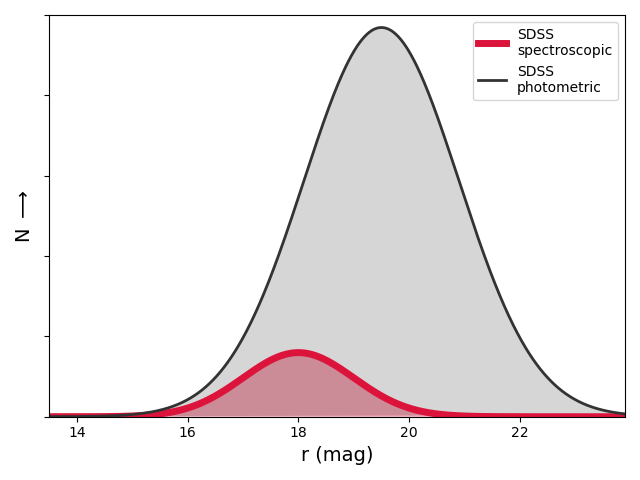

In [2]:
xgrid = np.linspace(13, 24, 1000)
magdist = lambda x, A, mu, sigma : A/(2*np.pi*sigma**2)**0.5*np.exp(-(x - mu)**2/(2*sigma**2))
fig, ax = plt.subplots()
ax.plot(xgrid, magdist(xgrid, 10, 18, 1), 
        'Crimson', lw=5, label='SDSS\nspectroscopic')
ax.fill(xgrid, magdist(xgrid, 10, 18, 1), 'Crimson', alpha=0.4)
ax.plot(xgrid, magdist(xgrid, 85, 19.5, 1.4), 
        '0.2', lw=2, label='SDSS\nphotometric')
ax.fill(xgrid, magdist(xgrid, 85, 19.5, 1.4), 
        '0.2', alpha=0.2)

ax.set_xlabel('r (mag)', fontsize=14)
ax.set_ylabel('N $\longrightarrow$', fontsize=14)
ax.set_yticklabels([])
ax.set_ylim(0,25)
ax.set_xlim(13.5,23.9)
ax.legend()
fig.tight_layout()
fig.savefig('./images/training_set.png')

In [3]:
X, y = make_blobs(n_samples=167, n_features=2, centers=2,
                  cluster_std=0.85, center_box=(- 3.0, 3.0), 
                  shuffle=True, random_state=1951)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [4]:
# mesh for predictions
h = 0.025
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<IPython.core.display.Javascript object>


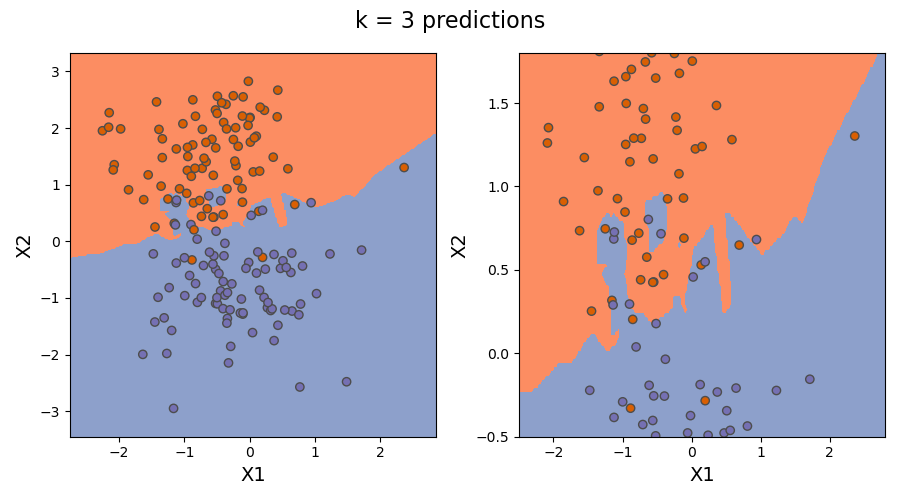

In [5]:
cmap_light = ListedColormap(["#fc8d62", "#8da0cb"])
cmap_bold = ListedColormap(["#d95f02", "#7570b3"])

fig, (ax, ax2) = plt.subplots(1,2, figsize=(9,5)) 

for a in (ax, ax2):
    a.contourf(xx, yy, Z, cmap=cmap_light)
    a.scatter(
        x=X[:, 0],
        y=X[:, 1],
        c=y,
        cmap=cmap_bold,
        alpha=1.0,
        edgecolor="0.3",
    )
    a.set_xlabel('X1', fontsize=14)
    a.set_ylabel('X2', fontsize=14)
ax2.set_xlim(-2.5, 2.8)
ax2.set_ylim(-0.5,1.8)
fig.suptitle('k = 3 predictions', fontsize=16)
fig.tight_layout()
fig.savefig('./images/knn3_example.png')

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# mesh for predictions
h = 0.025
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<IPython.core.display.Javascript object>


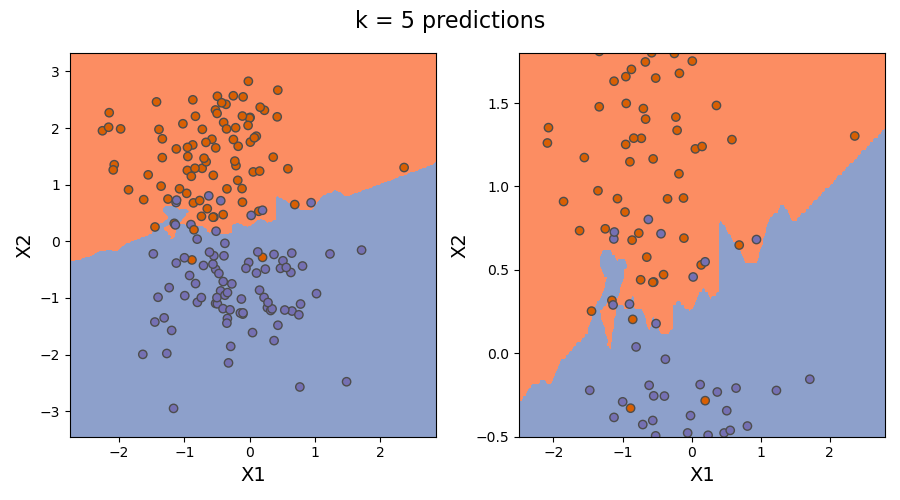

In [7]:
cmap_light = ListedColormap(["#fc8d62", "#8da0cb"])
cmap_bold = ListedColormap(["#d95f02", "#7570b3"])

fig, (ax, ax2) = plt.subplots(1,2, figsize=(9,5)) 

for a in (ax, ax2):
    a.contourf(xx, yy, Z, cmap=cmap_light)
    a.scatter(
        x=X[:, 0],
        y=X[:, 1],
        c=y,
        cmap=cmap_bold,
        alpha=1.0,
        edgecolor="0.3",
    )
    a.set_xlabel('X1', fontsize=14)
    a.set_ylabel('X2', fontsize=14)
ax2.set_xlim(-2.5, 2.8)
ax2.set_ylim(-0.5,1.8)
fig.suptitle('k = 5 predictions', fontsize=16)
fig.tight_layout()
fig.savefig('./images/knn5_example.png')

In [8]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# mesh for predictions
h = 0.025
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

<IPython.core.display.Javascript object>


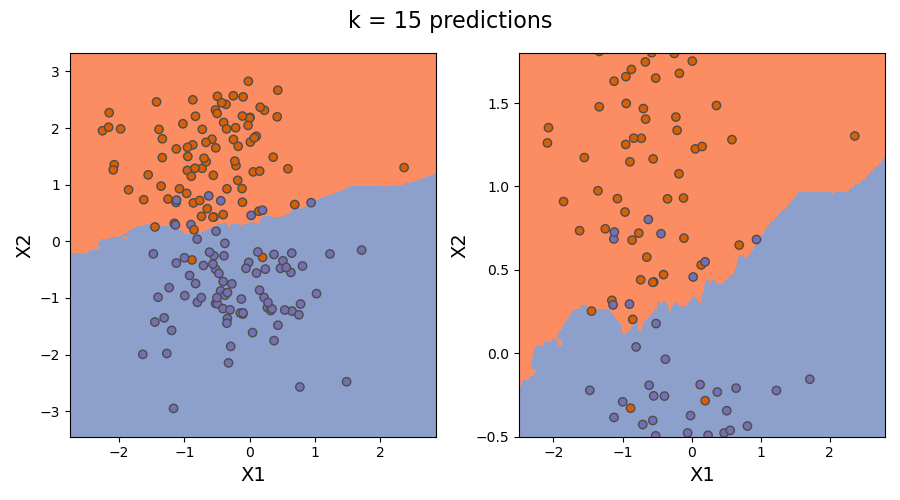

In [9]:
cmap_light = ListedColormap(["#fc8d62", "#8da0cb"])
cmap_bold = ListedColormap(["#d95f02", "#7570b3"])

fig, (ax, ax2) = plt.subplots(1,2, figsize=(9,5)) 

for a in (ax, ax2):
    a.contourf(xx, yy, Z, cmap=cmap_light)
    a.scatter(
        x=X[:, 0],
        y=X[:, 1],
        c=y,
        cmap=cmap_bold,
        alpha=1.0,
        edgecolor="0.3",
    )
    a.set_xlabel('X1', fontsize=14)
    a.set_ylabel('X2', fontsize=14)
ax2.set_xlim(-2.5, 2.8)
ax2.set_ylim(-0.5,1.8)
fig.suptitle('k = 15 predictions', fontsize=16)
fig.tight_layout()
fig.savefig('./images/knn15_example.png')